# includes

In [1]:
from data_proc import get_historic_data, get_all_historic_data, read_data_tail
from capture_plot import plt_capture_onclick, mpf


from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [2]:
print(mpf.__version__)

0.12.10b0


# simple flow

## configure data input

In [3]:
#check this:
# TOTAL_CANDLES = 120
# SYMBOL = 'BTCUSDT'
# INTERVAL ='15m'

# =====================================
TOTAL_CANDLES = 100
SYMBOL = 'BTCUSDT'
INTERVAL ='15m'

REFRESH_INPUT_DATA  = 1
#path for data storage:
path = '.\\.data\\ntb\\'

#get 3 days back from today
MAX_DAYS_TO_GET_BACK = 3
# =====================================
current_datetime = datetime.today()
current_date = current_datetime.date()  # Extract date from datetime
current_date_0h = current_datetime.replace(hour=0, minute=0, second=0, microsecond=0)

current_date_0h -= timedelta(days=MAX_DAYS_TO_GET_BACK)

# getting the timestamp for binance format
# current_date_0h= datetime.fromisoformat('2023-12-06 00:00:00')
t_start = int(datetime.timestamp(current_date_0h)*1000)

tc= '-'
# filename = SYMBOL+tc+INTERVAL+current_date.strftime('-%Y-%m-%d-')+str(TOTAL_CANDLES)+'.csv'
filename = SYMBOL+tc+INTERVAL+current_date.strftime('-%Y-%m-%d-')+'.csv'

if not os.path.exists(path+filename) or REFRESH_INPUT_DATA:
    # valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
    pair_df= get_historic_data(symbol=SYMBOL, timestamp=t_start, interval=INTERVAL, filename=path+filename)
    print(pair_df.shape) 
    
    #pair_df = get_all_historic_data(symbol=SYMBOL, interval=INTERVAL, filename=path+filename, key=bnc_key, secret=bnc_sec)
    pair_df = pair_df[-TOTAL_CANDLES:] #get only latest TOTAL_CANDLES entries
    print(pair_df.shape)
else:
    pair_df = read_data_tail(path+filename, TOTAL_CANDLES) #get only latest TOTAL_CANDLES entries


(369, 5)
(100, 5)


In [4]:
print(pair_df.index[0:10])
print(pair_df[0:5])

DatetimeIndex(['2023-12-09 17:15:00', '2023-12-09 17:30:00',
               '2023-12-09 17:45:00', '2023-12-09 18:00:00',
               '2023-12-09 18:15:00', '2023-12-09 18:30:00',
               '2023-12-09 18:45:00', '2023-12-09 19:00:00',
               '2023-12-09 19:15:00', '2023-12-09 19:30:00'],
              dtype='datetime64[ns]', name='Date', freq=None)
                         Open      High       Low     Close     Volume
Date                                                                  
2023-12-09 17:15:00  43893.52  43977.51  43893.52  43952.61  250.65591
2023-12-09 17:30:00  43952.62  44032.03  43929.74  43941.47  184.50393
2023-12-09 17:45:00  43941.46  43941.47  43889.87  43891.46  132.84671
2023-12-09 18:00:00  43891.46  43933.85  43877.34  43877.34  180.71621
2023-12-09 18:15:00  43877.34  43961.10  43877.34  43929.19  150.77571


## aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

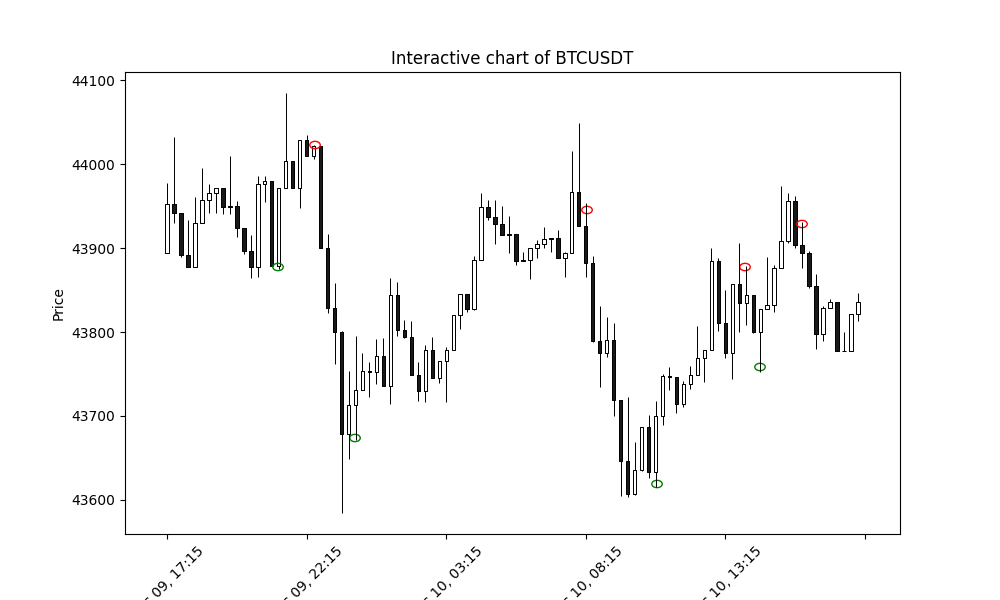

In [5]:
plt_filename = path+'m_'+ filename
# Load points from file and continue editing/start anew
plotter = plt_capture_onclick(pair_df, load_filename=plt_filename, pair_name = SYMBOL)

## store selections

In [19]:
# Save points to file
plotter.save_m_to_file()

## debug print from chart, on mouse click 

In [6]:
print(plotter.captured_output)

Data coords: (91.13633419354838, 43927.39457142858) date clicked: 2023-12-10 16:00:00  figure coords: (803, 375)
